# Predictive Analytics, Computer Vision & AI - CSC3831
## Coursework, Part 2: Machine Learning

As this coursework is as much about practical skills as it is about reflecting on the procedures and the results, you are expected to explain what you did, your reasoning for process decisions, as well as a thorough analysis of your results.

### 1. Load the MNIST dataset, visualise the first 20 digits, and print their corresponding labels.

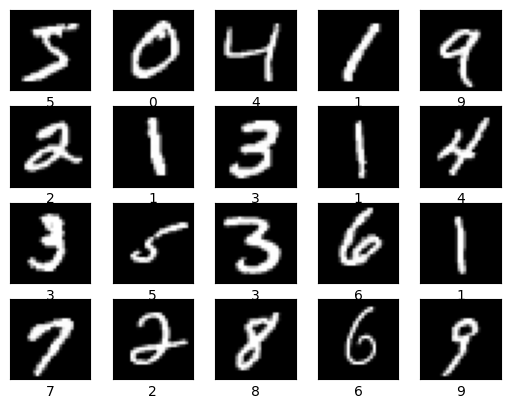

In [1]:
# Run this to load the MNIST dataset
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
)
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import (
    cross_val_score,
    GridSearchCV,
    train_test_split,
)
from sklearn.naive_bayes import (
    GaussianNB,
    MultinomialNB,
)
from sklearn.neighbors import (
    KNeighborsClassifier,
    KNeighborsRegressor,
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import (
    DecisionTreeClassifier,
    plot_tree,
)

X, y = fetch_openml(
    'mnist_784', version=1, return_X_y=True, parser='auto', as_frame=False
)

fig, ax = plt.subplots(4, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i].reshape(28, 28), cmap='gray')
    axi.set(xticks=[], yticks=[], xlabel=y[i])




### 2. Train a Logistic Regression classifier on this data, and report on your findings.
    
1. Tune your hyperparameters to ensure *sparse* weight vectors and high accuracy.
2. Visualise the classification vector for each class.

In [ ]:

seed = 42

reg = LogisticRegression(random_state=seed)


param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1'],  
    'solver': ['liblinear']  
}
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='accuracy')

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=seed,
)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)

# Best hyperparameters and cross-validation score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best CV Score: {grid_search.best_score_}')
print(f'Test Accuracy: {acc:.3f}')

best_params = grid_search.best_params_

best_log_reg = LogisticRegression(**best_params)
best_log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = best_log_reg.predict(X_test)

# Evaluate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", test_accuracy)


# user a scaler : 
# https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_to_Speed-up_Machine_Learning_Algorithms.ipynb 

# https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

### 3. Use PCA to reduce the dimensionality of your training data.
    
1. Determine the number of components necessary to explain 80\% of the variance
2. Plot the explained variance by number of components.
3. Visualise the 20 principal components' loadings
4. Plot the two principal components for your data using a scatterplot, colouring by class. What can you say about this plot?
5. Visualise the first 20 digits, *generated from their lower-dimensional representation*.

### 4. Generate a noisy copy of your data by adding random normal noise to the digits **with a scale that doesn't completely destroy the signal**. This is, the resulting images noise should be apparent, but the numbers should still be understandable.
    
1. Visualise the first 20 digits from the noisy dataset.
2. Filter the noise by fitting a PCA explaining **a sufficient proportion** of the variance, and then transforming the noisy dataset. Figuring out this proportion is part of the challenge.
3. Visualise the first 20 digits of the de-noised dataset.